1
1
mean estimate: 0.2513513513513514
mean estimate: 0.7470695773739099
mean estimate: 0.4652567975830818
total reward earned: 7194.0
overall win rate: 0.7194
num_times_explored: 1022
num_times_exploited: 8978
num times selected optimal bandit: 9299


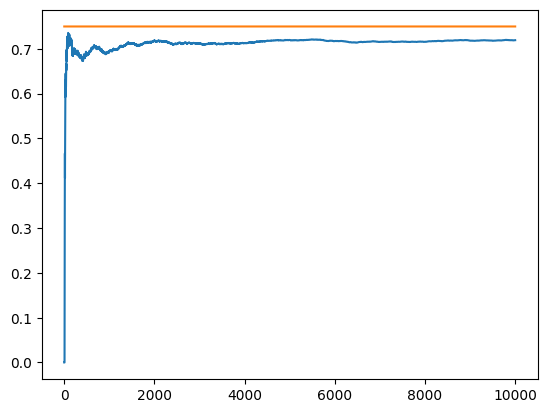

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
N=10000
rewards = np.zeros(N)
p_ref=[0.25,0.75,0.5]
p_explore=0.1
p_exploit=1-p_explore
n_explored=0
n_exploited=0
n_optimal=0

class Bandit():
    def __init__(self,p):
        self.p=p
        self.p_est = 0
        self.n=0

    def pull(self):
        return np.random.random()<self.p
    
    def update(self,win):
        self.n += 1.
        self.p_est = (win+(self.n-1)*self.p_est)/self.n

bandits = [Bandit(p) for p in p_ref]
x=[b.p for b in bandits]
xmx = max(x)
optimal_j=x.index(xmx)
print(optimal_j)
print(np.argmax([b.p for b in bandits])) # Why do I get a warning here.

for i in range(N):
    if np.random.random()<p_explore:
        n_explored+=1
        j = np.random.randint(len(bandits))
    else:
        n_exploited += 1
        l=[b.p_est for b in bandits]
        lmx=max(l)
        j = l.index(lmx)        
    
    if j == optimal_j:
        n_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

 # print mean estimates for each bandit
for b in bandits:
    print("mean estimate:", b.p_est)

  # print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / N)
print("num_times_explored:", n_explored)
print("num_times_exploited:", n_exploited)
print("num times selected optimal bandit:", n_optimal)

  # plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(N) + 1)
plt.plot(win_rates)
plt.plot(np.ones(N)*np.max(p_ref))
plt.show()
        